In [19]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('PrvaTabela.csv', delimiter=';', encoding= 'unicode_escape')


In [4]:
df.head()

,Patient ID,Age recode with single ages and 85+,Race/ethnicity,Sex,Year of diagnosis,Site recode ICD-O-3/WHO 2008,SEER historic stage A (1973-2015),CS tumor size (2004-2015),CS extension (2004-2015),CS lymph nodes (2004-2015),CS mets at dx (2004-2015),COD to site recode,Survival months,Sequence number,Total number of in situ/malignant tumors for patient,Total number of benign/borderline tumors for patient,Reason no cancer-directed surgery
0,10080117,04 years,White,Female,1975,Bones and Joints,Distant,Blank(s),Blank(s),Blank(s),Blank(s),Bones and Joints,7,One primary only,1,0,"Recommended but not performed, unknown reason"
1,22924441,05 years,White,Male,1975,Bones and Joints,Localized,Blank(s),Blank(s),Blank(s),Blank(s),Alive,496,One primary only,1,0,"Recommended but not performed, unknown reason"
2,22925821,05 years,White,Female,1975,Bones and Joints,Regional,Blank(s),Blank(s),Blank(s),Blank(s),Bones and Joints,26,One primary only,1,0,Surgery performed
3,10123525,06 years,White,Male,1975,Bones and Joints,Regional,Blank(s),Blank(s),Blank(s),Blank(s),Bones and Joints,23,One primary only,1,0,"Recommended but not performed, unknown reason"
4,22927100,09 years,White,Female,1975,Bones and Joints,Distant,Blank(s),Blank(s),Blank(s),Blank(s),Alive,510,One primary only,1,0,Surgery performed


In [5]:
df.rename(columns={'Age recode with single ages and 85+':'Age','Race/ethnicity':'Race',
                   'Total number of in situ/malignant tumors for patient':'TN malignat','Total number of benign/borderline tumors for patient':'TN benign','SEER historic stage A (1973-2015)':'Stage',
                   'Site recode ICD-O-3/WHO 2008':'Place','Year of diagnosis':'Diagnosed'}, inplace = True)

In [6]:
df.head()

,Patient ID,Age,Race,Sex,Diagnosed,Place,Stage,CS tumor size (2004-2015),CS extension (2004-2015),CS lymph nodes (2004-2015),CS mets at dx (2004-2015),COD to site recode,Survival months,Sequence number,TN malignat,TN benign,Reason no cancer-directed surgery
0,10080117,04 years,White,Female,1975,Bones and Joints,Distant,Blank(s),Blank(s),Blank(s),Blank(s),Bones and Joints,7,One primary only,1,0,"Recommended but not performed, unknown reason"
1,22924441,05 years,White,Male,1975,Bones and Joints,Localized,Blank(s),Blank(s),Blank(s),Blank(s),Alive,496,One primary only,1,0,"Recommended but not performed, unknown reason"
2,22925821,05 years,White,Female,1975,Bones and Joints,Regional,Blank(s),Blank(s),Blank(s),Blank(s),Bones and Joints,26,One primary only,1,0,Surgery performed
3,10123525,06 years,White,Male,1975,Bones and Joints,Regional,Blank(s),Blank(s),Blank(s),Blank(s),Bones and Joints,23,One primary only,1,0,"Recommended but not performed, unknown reason"
4,22927100,09 years,White,Female,1975,Bones and Joints,Distant,Blank(s),Blank(s),Blank(s),Blank(s),Alive,510,One primary only,1,0,Surgery performed


In [7]:
df['Age'] = df['Age'].apply(lambda x: x.split(' ')[0])

In [61]:
df.head()

,Patient ID,Age,Race,Sex,Diagnosed,Place,Stage,tumor size,extension,lymph nodes,mets,COD to site recode,Survival months,Sequence number,TN malignat,TN benign,Reason no cancer-directed surgery
0,10080117,4,White,Female,1975,Bones and Joints,Distant,<NA>,<NA>,<NA>,<NA>,Bones and Joints,7,One primary only,1,0,"Recommended but not performed, unknown reason"
1,22924441,5,White,Male,1975,Bones and Joints,Localized,<NA>,<NA>,<NA>,<NA>,Alive,496,One primary only,1,0,"Recommended but not performed, unknown reason"
2,22925821,5,White,Female,1975,Bones and Joints,Regional,<NA>,<NA>,<NA>,<NA>,Bones and Joints,26,One primary only,1,0,Surgery performed
3,10123525,6,White,Male,1975,Bones and Joints,Regional,<NA>,<NA>,<NA>,<NA>,Bones and Joints,23,One primary only,1,0,"Recommended but not performed, unknown reason"
4,22927100,9,White,Female,1975,Bones and Joints,Distant,<NA>,<NA>,<NA>,<NA>,Alive,510,One primary only,1,0,Surgery performed


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1134 entries, 0 to 1133
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Patient ID                         1134 non-null   int64 
 1   Age                                1134 non-null   int32 
 2   Race                               1134 non-null   object
 3   Sex                                1134 non-null   object
 4   Diagnosed                          1134 non-null   int64 
 5   Place                              1134 non-null   object
 6   Stage                              1134 non-null   object
 7   CS tumor size (2004-2015)          1134 non-null   object
 8   CS extension (2004-2015)           1134 non-null   object
 9   CS lymph nodes (2004-2015)         1134 non-null   object
 10  CS mets at dx (2004-2015)          1134 non-null   object
 11  COD to site recode                 1134 non-null   object
 12  Surviv

In [17]:
df['Age'] = df['Age'].astype(int)

In [62]:
df.isna().sum()

Patient ID                             0
Age                                    0
Race                                   3
Sex                                    0
Diagnosed                              0
Place                                  0
Stage                                 60
tumor size                           753
extension                            753
lymph nodes                          753
mets                                 753
COD to site recode                     0
Survival months                        3
Sequence number                        0
TN malignat                            0
TN benign                              0
Reason no cancer-directed surgery      0
dtype: int64

In [30]:
df = df.replace('Unknown', np.nan)
df = df.replace('Blank(s)', np.nan)

In [59]:
df.head()

,Patient ID,Age,Race,Sex,Diagnosed,Place,Stage,tumor size,extension,lymph nodes,mets,COD to site recode,Survival months,Sequence number,TN malignat,TN benign,Reason no cancer-directed surgery
0,10080117,4,White,Female,1975,Bones and Joints,Distant,<NA>,<NA>,<NA>,<NA>,Bones and Joints,7,One primary only,1,0,"Recommended but not performed, unknown reason"
1,22924441,5,White,Male,1975,Bones and Joints,Localized,<NA>,<NA>,<NA>,<NA>,Alive,496,One primary only,1,0,"Recommended but not performed, unknown reason"
2,22925821,5,White,Female,1975,Bones and Joints,Regional,<NA>,<NA>,<NA>,<NA>,Bones and Joints,26,One primary only,1,0,Surgery performed
3,10123525,6,White,Male,1975,Bones and Joints,Regional,<NA>,<NA>,<NA>,<NA>,Bones and Joints,23,One primary only,1,0,"Recommended but not performed, unknown reason"
4,22927100,9,White,Female,1975,Bones and Joints,Distant,<NA>,<NA>,<NA>,<NA>,Alive,510,One primary only,1,0,Surgery performed


In [60]:
df.isna().sum()

Patient ID                             0
Age                                    0
Race                                   3
Sex                                    0
Diagnosed                              0
Place                                  0
Stage                                 60
tumor size                           753
extension                            753
lymph nodes                          753
mets                                 753
COD to site recode                     0
Survival months                        3
Sequence number                        0
TN malignat                            0
TN benign                              0
Reason no cancer-directed surgery      0
dtype: int64

In [58]:


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1134 entries, 0 to 1133
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Patient ID                         1134 non-null   int64 
 1   Age                                1134 non-null   int32 
 2   Race                               1131 non-null   object
 3   Sex                                1134 non-null   object
 4   Diagnosed                          1134 non-null   int32 
 5   Place                              1134 non-null   object
 6   Stage                              1074 non-null   object
 7   tumor size                         381 non-null    Int32 
 8   extension                          381 non-null    Int32 
 9   lymph nodes                        381 non-null    Int32 
 10  mets                               381 non-null    Int32 
 11  COD to site recode                 1134 non-null   object
 12  Surviv

In [52]:
df.rename(columns={'CS tumor size (2004-2015)':'tumor size','CS extension (2004-2015)':'extension',
                   'CS lymph nodes (2004-2015)':'lymph nodes','CS mets at dx (2004-2015)':'mets'}, inplace = True)


In [41]:
df['Survival months'] = df['Survival months'].astype(np.float).astype("Int32")


In [46]:
df['tumor size'] = df['tumor size'].astype(np.float).astype("Int32")


In [57]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1134 entries, 0 to 1133
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Patient ID                         1134 non-null   int64 
 1   Age                                1134 non-null   int32 
 2   Race                               1131 non-null   object
 3   Sex                                1134 non-null   object
 4   Diagnosed                          1134 non-null   int32 
 5   Place                              1134 non-null   object
 6   Stage                              1074 non-null   object
 7   tumor size                         381 non-null    Int32 
 8   extension                          381 non-null    Int32 
 9   lymph nodes                        381 non-null    Int32 
 10  mets                               381 non-null    Int32 
 11  COD to site recode                 1134 non-null   object
 12  Surviv

In [67]:
df['extension'] = df['extension'].astype(np.float).astype("Int32")
df['lymph nodes'] = df['lymph nodes'].astype(np.float).astype("Int32")
df['mets'] = df['mets'].astype(np.float).astype("Int32")

In [63]:
df.to_csv('table1done.csv')

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1134 entries, 0 to 1133
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Patient ID                         1134 non-null   int64 
 1   Age                                1134 non-null   int32 
 2   Race                               1131 non-null   object
 3   Sex                                1134 non-null   object
 4   Diagnosed                          1134 non-null   int32 
 5   Place                              1134 non-null   object
 6   Stage                              1074 non-null   object
 7   tumor size                         381 non-null    Int32 
 8   extension                          381 non-null    Int32 
 9   lymph nodes                        381 non-null    Int32 
 10  mets                               381 non-null    Int32 
 11  COD to site recode                 1134 non-null   object
 12  Surviv

<AxesSubplot:xlabel='TN benign'>

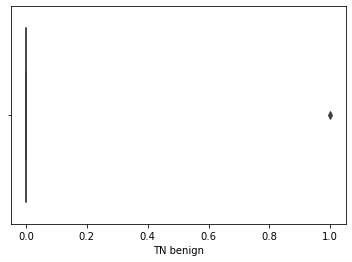

In [77]:
sns.boxplot(x=df['TN benign'])

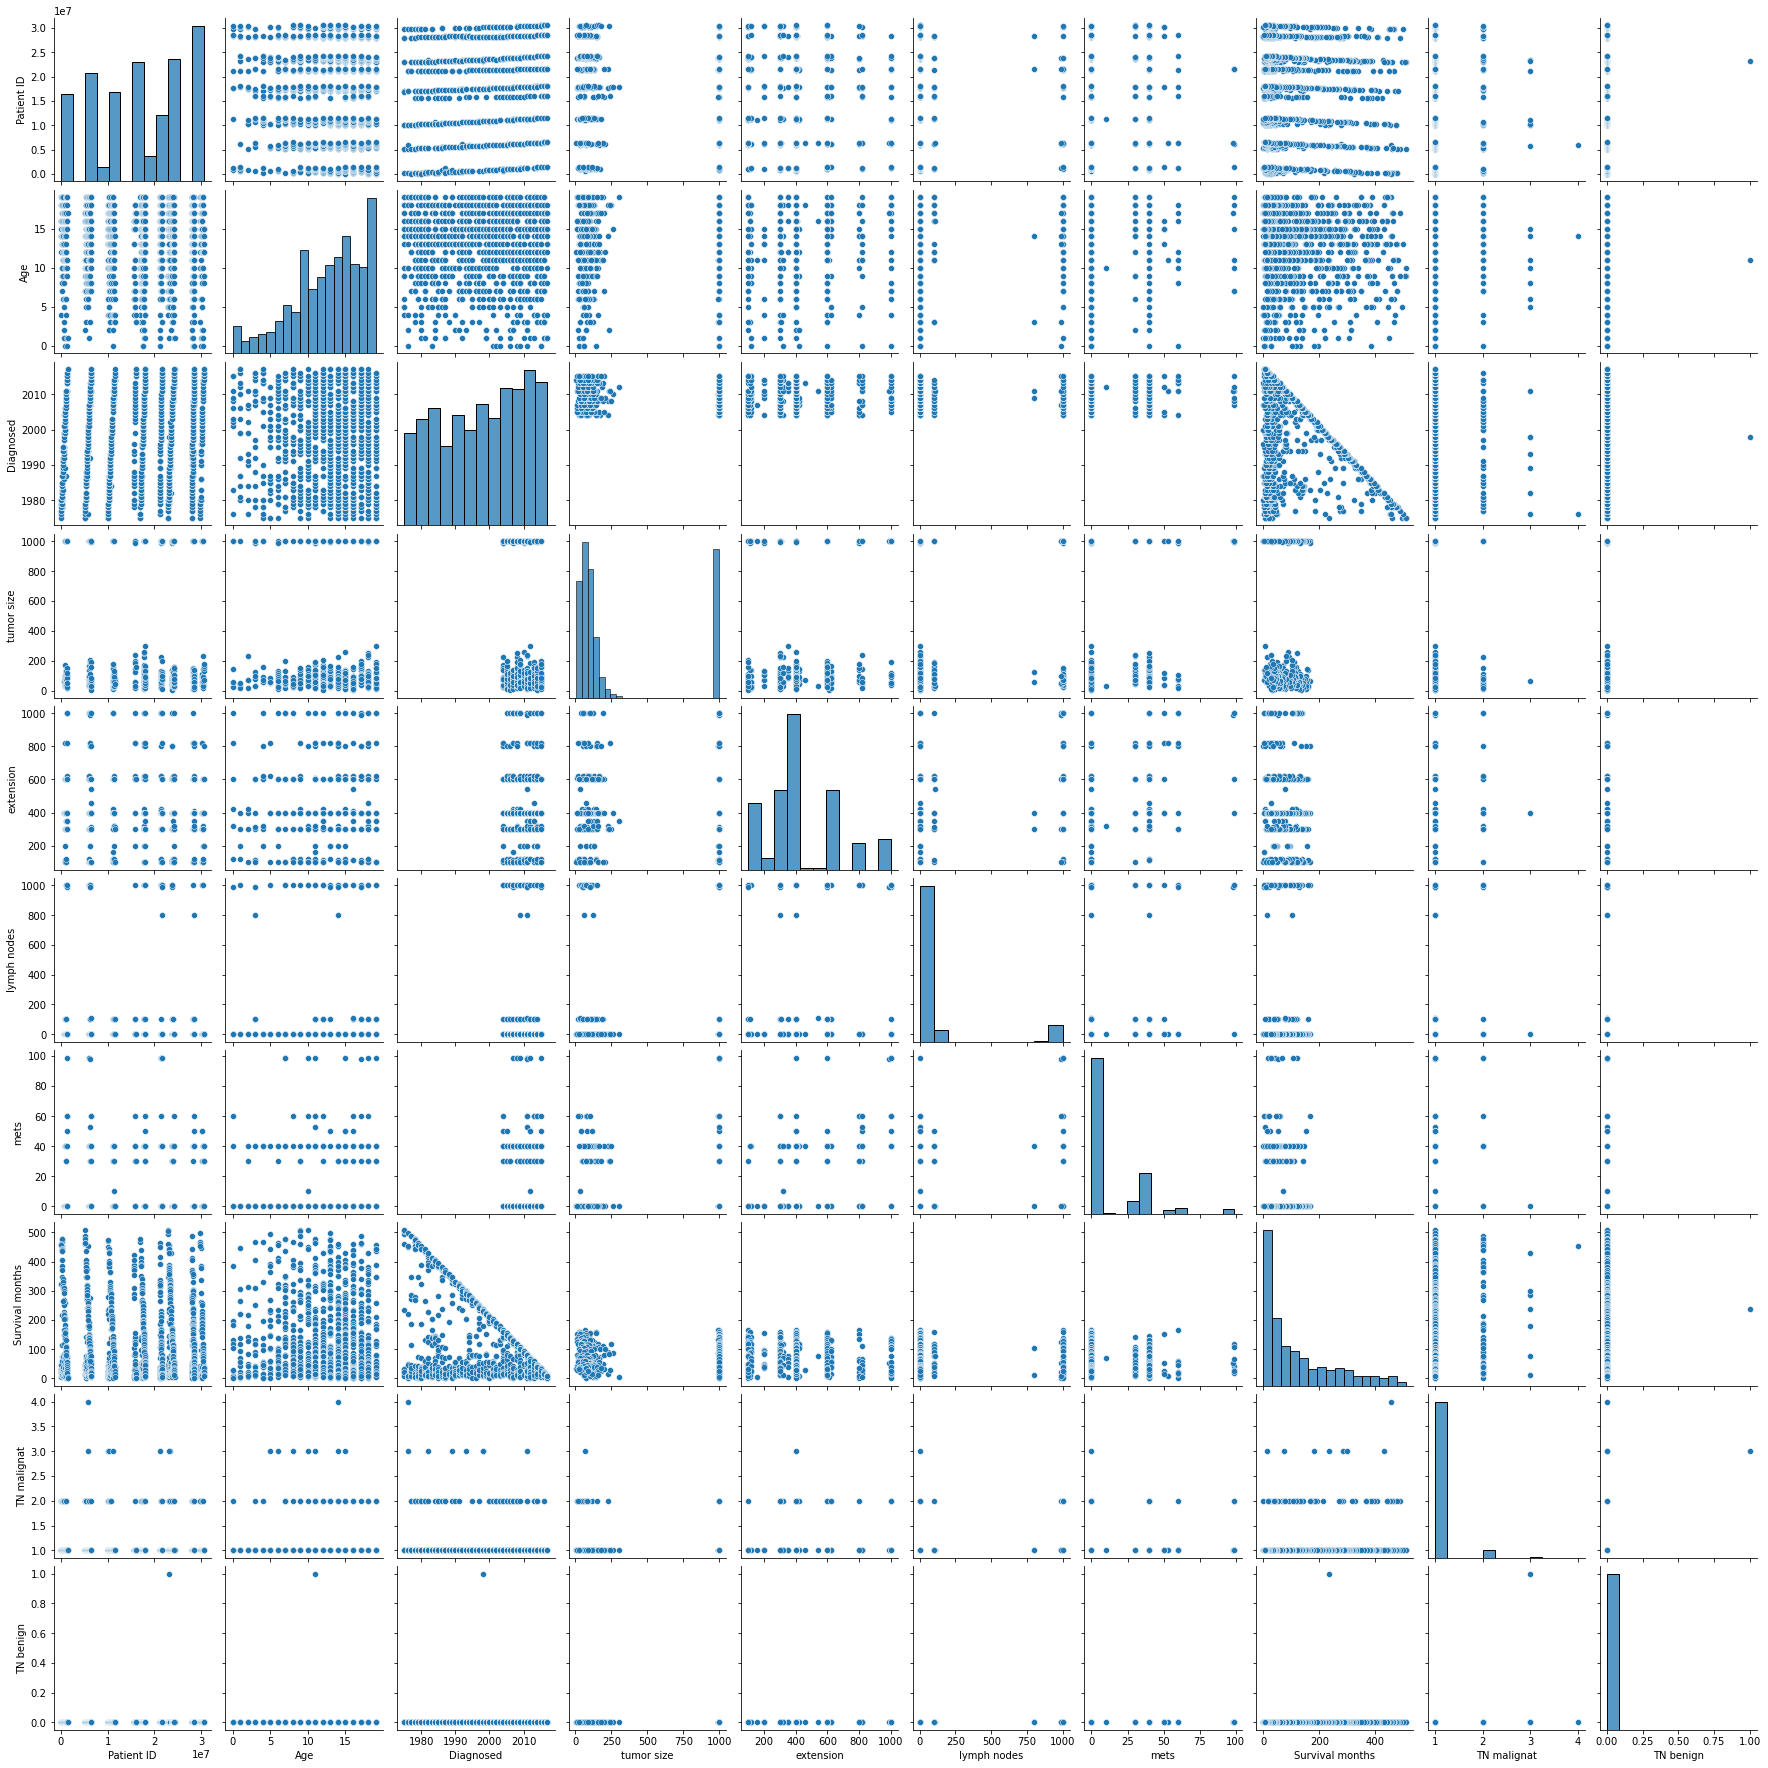

In [80]:
sns.pairplot(df)

In [84]:
df.isna().sum()


Patient ID                             0
Age                                    0
Race                                   3
Sex                                    0
Diagnosed                              0
Place                                  0
Stage                                 60
tumor size                           753
extension                            753
lymph nodes                          753
mets                                 753
COD to site recode                     0
Survival months                        3
Sequence number                        0
TN malignat                            0
TN benign                              0
Reason no cancer-directed surgery      0
dtype: int64

In [89]:
df.shape

(1134, 17)